In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import re
import tldextract

In [2]:
df=pd.read_csv('malicious_phish.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
df.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [5]:
#nema NA vrednosti
df.isna().sum()

url     0
type    0
dtype: int64

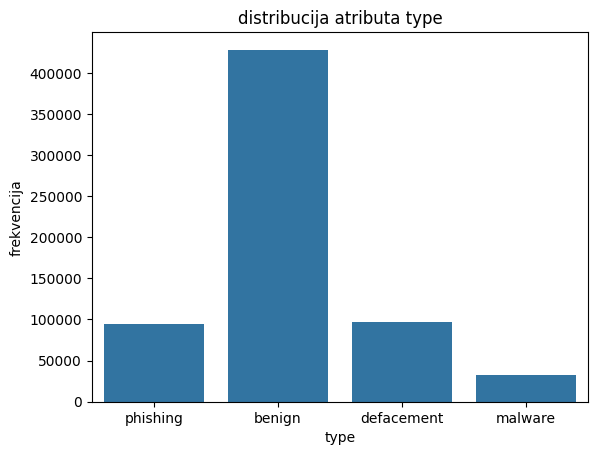

In [6]:
#raspodela 
sns.countplot(x='type',data=df)
plt.xlabel('type')
plt.ylabel('frekvencija')
plt.title('distribucija atributa type')
plt.show()

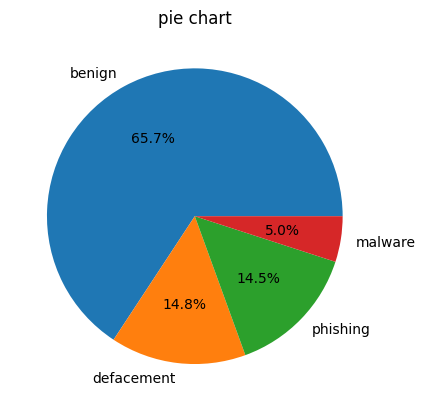

In [7]:
frekv=df['type'].value_counts()
plt.pie(frekv,labels=frekv.index, autopct='%1.1f%%')
plt.title('pie chart')
plt.show()

##ovo ukazuje na nebalansiranost skupa podataka, posebno zbog toga što klasa benign dominira u odnosu na druge klase.

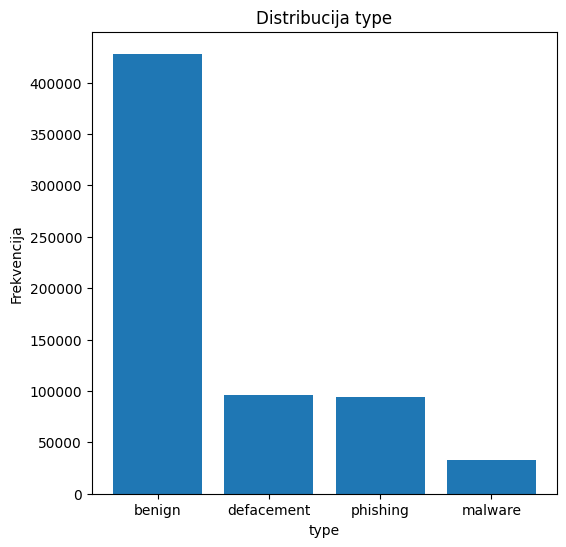

In [8]:
freq=df['type'].value_counts()
plt.figure(figsize=(6,6))
plt.bar(freq.index,freq.values)
plt.xlabel('type')
plt.ylabel('Frekvencija')
plt.title('Distribucija type')
plt.show()


In [9]:
prazni_stringovi = (df == '').sum()
print("\nBroj praznih stringova po kolonama:")
print(prazni_stringovi)


Broj praznih stringova po kolonama:
url     0
type    0
dtype: int64


<h3>Undersampling</h3>

In [10]:
frekv=df['type'].value_counts()

In [11]:
min_frekv=frekv.min()

In [12]:
dfs=[]
for frkv in frekv.index:
    frkv_df=df[df['type']==frkv]
    sampled_frkv=frkv_df.sample(n=min_frekv,random_state=42)
    dfs.append(sampled_frkv)

df_undersampled=pd.concat(dfs)
    

In [13]:
print('Raspodela klasa nakon undersamplinga')
print(df_undersampled['type'].value_counts())

Raspodela klasa nakon undersamplinga
type
benign        32520
defacement    32520
phishing      32520
malware       32520
Name: count, dtype: int64


In [14]:
frekv_undersampled=df_undersampled['type'].value_counts()

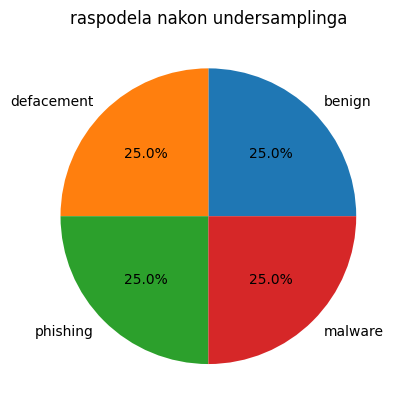

In [15]:
plt.pie(frekv_undersampled,labels=frekv_undersampled.index,autopct='%1.1f%%')
plt.title('raspodela nakon undersamplinga')
plt.show()

<h3>Feature engineering</h3>

<h4>Duzina URL</h4>

In [16]:
df_undersampled['duzina_url']= df_undersampled['url'].apply(len)

In [17]:
mean_length=df_undersampled.groupby('type')['duzina_url'].mean().sort_values()

Text(0, 0.5, 'url length')

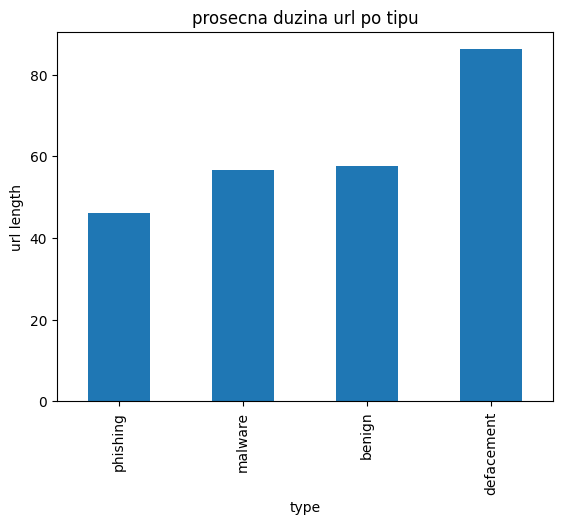

In [18]:
mean_length.plot(kind='bar')
plt.title('prosecna duzina url po tipu')
plt.ylabel('url length')

<h4>Duzina domena</h4>

In [19]:
def duzina_domena(url):
    extracted = tldextract.extract(url)
    
    if extracted.subdomain:
        full_domain = f"{extracted.subdomain}.{extracted.domain}.{extracted.suffix}"
    else:
        full_domain = f"{extracted.domain}.{extracted.suffix}"
    
    return len(full_domain)

In [20]:
df_undersampled['duzina_domena']=df_undersampled['url'].apply(lambda url:duzina_domena(url))

In [21]:
df_undersampled.head(20)

,url,type,duzina_url,duzina_domena
514768,montreal.louer.com/ahuntsic-rentals/houses-rent/,benign,48,18
222536,comunidade.sol.pt/blogs/hytigin/default.aspx,benign,44,17
276748,youtube.com/watch?v=PUDOlyCpHwo,benign,31,11
50193,uiowa.edu/~acadtech/phonetics/,benign,30,9
339822,flixster.com/actor/steve-mcqueen,benign,32,12
174885,http://stackoverflow.com/questions/5069876/reg...,benign,105,17
187420,en.goldenmap.com/City_of_Playford,benign,33,16
434789,content.usatoday.com/community/tags/topic.aspx...,benign,71,20
153097,music.concordia.ca/,benign,19,18
50095,en.wikipedia.org/wiki/Aveos_Fleet_Performance,benign,45,16


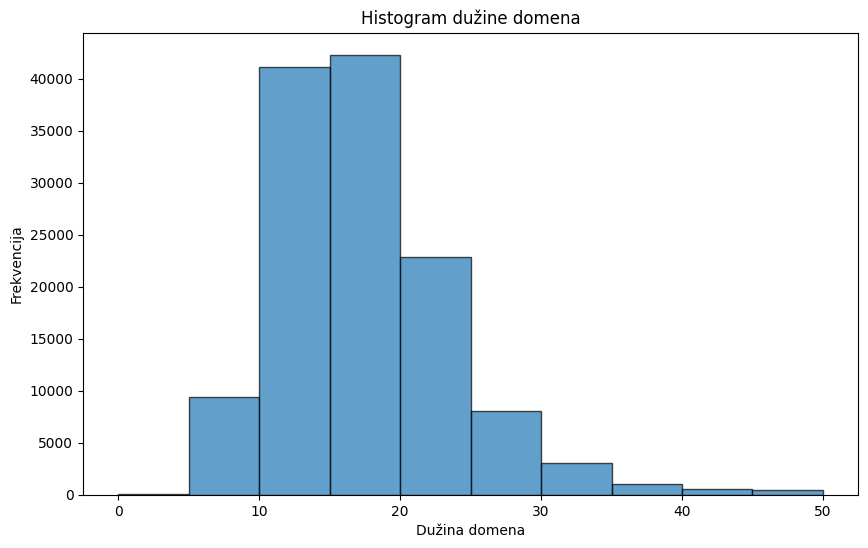

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df_undersampled['duzina_domena'], bins=10, edgecolor='k', alpha=0.7,range=(0,50))
plt.title('Histogram dužine domena')
plt.xlabel('Dužina domena')
plt.ylabel('Frekvencija')
plt.grid(False)
plt.show()

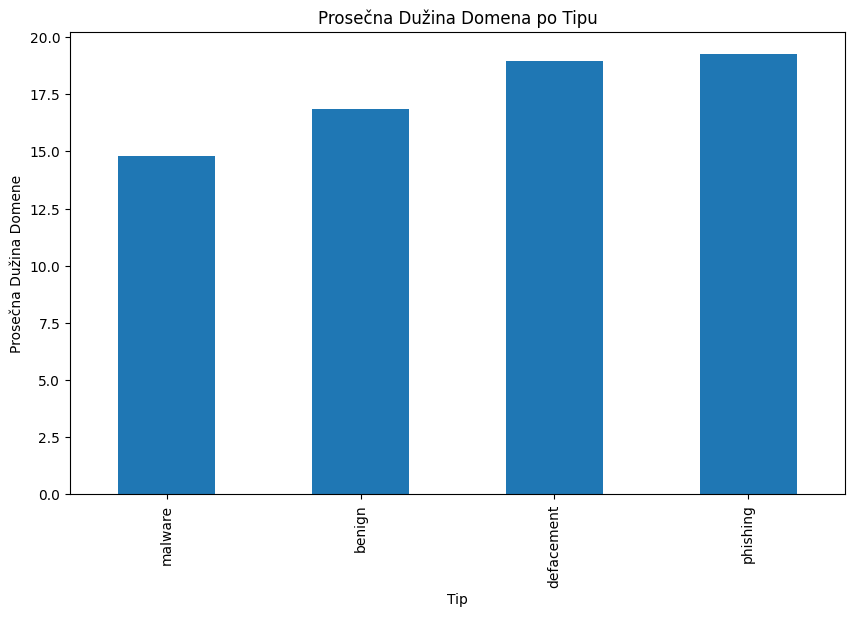

In [23]:
srednja_duzina=df_undersampled.groupby('type')['duzina_domena'].mean().sort_values()
plt.figure(figsize=(10, 6))
srednja_duzina.plot(kind='bar')
plt.title('Prosečna Dužina Domenа po Tipu')
plt.xlabel('Tip')
plt.ylabel('Prosečna Dužina Domene')
plt.show()


In [24]:
df_undersampled.describe()

,duzina_url,duzina_domena
count,130080.000000,130080.00000
mean,61.608933,17.46619
std,42.796276,9.06015
min,1.000000,2.00000
25%,33.000000,13.00000
50%,49.000000,16.00000
75%,81.000000,20.00000
max,1517.000000,239.00000


<h4>Da li URL sadrzi ip adresu?</h4>

In [25]:
def sadrzi_ip_addresu(url):
    # Regularni izrazi za IPv4 i IPv6
    ipv4_pattern = (
        r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b'
    )
    ipv6_pattern = (
        r'\b(?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b|'  # Standardni IPv6
        r'(?:[0-9a-fA-F]{1,4}:){1,7}:|'                      # Uncured IPv6
        r'(?:[0-9a-fA-F]{1,4}:){1,6}:[0-9a-fA-F]{1,4}|'
        r'(?:[0-9a-fA-F]{1,4}:){1,5}(?::[0-9a-fA-F]{1,4}){1,2}|'
        r'(?:[0-9a-fA-F]{1,4}:){1,4}(?::[0-9a-fA-F]{1,4}){1,3}|'
        r'(?:[0-9a-fA-F]{1,4}:){1,3}(?::[0-9a-fA-F]{1,4}){1,4}|'
        r'(?:[0-9a-fA-F]{1,4}:){1,2}(?::[0-9a-fA-F]{1,4}){1,5}|'
        r'[0-9a-fA-F]{1,4}:(?::[0-9a-fA-F]{1,4}){1,6}|'
        r'(?::(?::[0-9a-fA-F]{1,4}){1,7}|'
        r'::[0-9a-fA-F]{1,4}){1,7}\b'
    )
    
    # Kombinovani regularni izraz
    pattern = f'{ipv4_pattern}|{ipv6_pattern}'
    
    # Parsirajte URL i izvadite hostname
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    
    if hostname:
        # Pretražimo hostname za IP adrese
        match = re.search(pattern, hostname)
        return 1 if match else 0
    else:
        return 0


In [26]:
df_undersampled['ima_ip_adresu']=df_undersampled['url'].apply(sadrzi_ip_addresu)

In [27]:
df_undersampled[df_undersampled['ima_ip_adresu']==1].head()

,url,type,duzina_url,duzina_domena,ima_ip_adresu
110247,http://66.184.94.210/paypal/finish.php,phishing,38,14,1
256043,http://27.120.84.31/~kanfitbu/properties/remax/,phishing,47,13,1
526927,http://66.45.251.211/,phishing,21,14,1
531320,http://185.177.54.1/TP/public/index.php,phishing,39,13,1
524413,http://175.107.206.134/wp-content/plugins/rbcb...,phishing,172,16,1


In [28]:
print(pd.crosstab(df_undersampled['type'],df_undersampled['ima_ip_adresu']))

ima_ip_adresu      0      1
type                       
benign         32520      0
defacement     32520      0
malware        20761  11759
phishing       32414    106


<h4>Protokol</h4>

In [29]:
def protokol(url):
    return urlparse(url).scheme

In [30]:
df_undersampled['protokol']=df_undersampled['url'].apply(lambda url:protokol(url))

In [31]:
df_undersampled.head(10)

,url,type,duzina_url,duzina_domena,ima_ip_adresu,protokol
514768,montreal.louer.com/ahuntsic-rentals/houses-rent/,benign,48,18,0,
222536,comunidade.sol.pt/blogs/hytigin/default.aspx,benign,44,17,0,
276748,youtube.com/watch?v=PUDOlyCpHwo,benign,31,11,0,
50193,uiowa.edu/~acadtech/phonetics/,benign,30,9,0,
339822,flixster.com/actor/steve-mcqueen,benign,32,12,0,
174885,http://stackoverflow.com/questions/5069876/reg...,benign,105,17,0,http
187420,en.goldenmap.com/City_of_Playford,benign,33,16,0,
434789,content.usatoday.com/community/tags/topic.aspx...,benign,71,20,0,
153097,music.concordia.ca/,benign,19,18,0,
50095,en.wikipedia.org/wiki/Aveos_Fleet_Performance,benign,45,16,0,


In [32]:
df_undersampled['protokol'].value_counts()

protokol
http                            65749
                                54870
https                            9437
dbpedia.openlinksw.com              5
activation-pp.3utilities.com        2
gopher.quux.org                     2
www.mit.edu                         2
www-vs.informatik.uni-ulm.de        1
www.ee.ryerson.ca                   1
john.ccac.rwth-aachen.de            1
ww2.ant-nat.com                     1
ilpubs.stanford.edu                 1
www.listhost.net                    1
crib.lehn.org                       1
ftp                                 1
eagle.cch.kcl.ac.uk                 1
pgsql.ru                            1
gwj194.internetdsl.tpnet.pl         1
icscardnl.istmein.de                1
escuelanet.com                      1
Name: count, dtype: int64

<h3>Domen,subdomen,sufiks</h3>

In [33]:
def subdomen(url):
    ext=tldextract.extract(url)
    return ext.subdomain

In [34]:
def domen(url):
    ext=tldextract.extract(url)
    return ext.domain

In [35]:
def sufiks(url):
    ext=tldextract.extract(url)
    return ext.suffix

In [36]:
df_undersampled['subdomen']=df_undersampled['url'].apply(lambda url:subdomen(url))

In [37]:
df_undersampled['domen']=df_undersampled['url'].apply(lambda url:domen(url))

In [38]:
df_undersampled['sufiks']=df_undersampled['url'].apply(lambda url:sufiks(url))

In [39]:
df_undersampled.head(10)

,url,type,duzina_url,duzina_domena,ima_ip_adresu,protokol,subdomen,domen,sufiks
514768,montreal.louer.com/ahuntsic-rentals/houses-rent/,benign,48,18,0,,montreal,louer,com
222536,comunidade.sol.pt/blogs/hytigin/default.aspx,benign,44,17,0,,comunidade,sol,pt
276748,youtube.com/watch?v=PUDOlyCpHwo,benign,31,11,0,,,youtube,com
50193,uiowa.edu/~acadtech/phonetics/,benign,30,9,0,,,uiowa,edu
339822,flixster.com/actor/steve-mcqueen,benign,32,12,0,,,flixster,com
174885,http://stackoverflow.com/questions/5069876/reg...,benign,105,17,0,http,,stackoverflow,com
187420,en.goldenmap.com/City_of_Playford,benign,33,16,0,,en,goldenmap,com
434789,content.usatoday.com/community/tags/topic.aspx...,benign,71,20,0,,content,usatoday,com
153097,music.concordia.ca/,benign,19,18,0,,music,concordia,ca
50095,en.wikipedia.org/wiki/Aveos_Fleet_Performance,benign,45,16,0,,en,wikipedia,org


<h3>Duzina putanje </h3>

In [40]:
def duzina_putanje(url):
   return len(urlparse(url).path)

In [41]:
df_undersampled['duzina_putanje']=df_undersampled['url'].apply(lambda url:duzina_putanje(url))

In [42]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130080 entries, 514768 to 546320
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   url             130080 non-null  object
 1   type            130080 non-null  object
 2   duzina_url      130080 non-null  int64 
 3   duzina_domena   130080 non-null  int64 
 4   ima_ip_adresu   130080 non-null  int64 
 5   protokol        130080 non-null  object
 6   subdomen        130080 non-null  object
 7   domen           130080 non-null  object
 8   sufiks          130080 non-null  object
 9   duzina_putanje  130080 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 10.9+ MB


In [43]:
prosecna_duzina_putanje=df_undersampled.groupby('type')['duzina_putanje'].mean().sort_values()

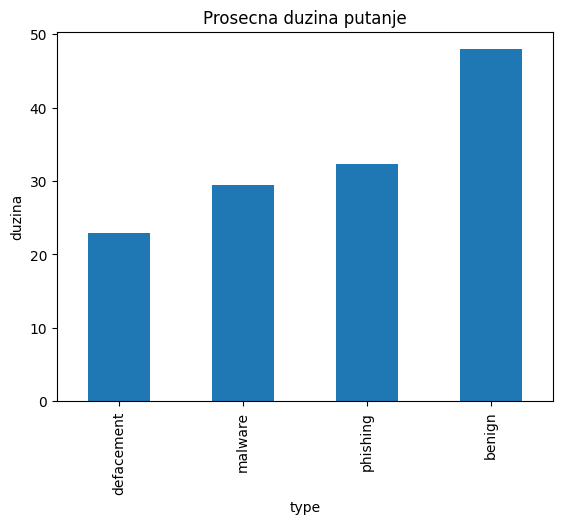

In [44]:
prosecna_duzina_putanje.plot(kind='bar')
plt.title('Prosecna duzina putanje')
plt.xlabel('type')
plt.ylabel('duzina')
plt.show()

<h4>Da li sadrzi parametre</h4>

In [45]:
def sadrzi_parametre(url):
    return bool(urlparse(url).params)

In [46]:
df_undersampled['sadrzi_parametre']=df_undersampled['url'].apply(lambda url:sadrzi_parametre(url))

<h4>Da li sadrzi upit</h4>

In [47]:
def sadrzi_upit(url):
    return bool(urlparse(url).query)

In [48]:
df_undersampled['sadrzi_upit']=df_undersampled['url'].apply(lambda url:sadrzi_upit(url))

In [49]:
df_undersampled.head(15)

,url,type,duzina_url,duzina_domena,ima_ip_adresu,protokol,subdomen,domen,sufiks,duzina_putanje,sadrzi_parametre,sadrzi_upit
514768,montreal.louer.com/ahuntsic-rentals/houses-rent/,benign,48,18,0,,montreal,louer,com,48,False,False
222536,comunidade.sol.pt/blogs/hytigin/default.aspx,benign,44,17,0,,comunidade,sol,pt,44,False,False
276748,youtube.com/watch?v=PUDOlyCpHwo,benign,31,11,0,,,youtube,com,17,False,True
50193,uiowa.edu/~acadtech/phonetics/,benign,30,9,0,,,uiowa,edu,30,False,False
339822,flixster.com/actor/steve-mcqueen,benign,32,12,0,,,flixster,com,32,False,False
174885,http://stackoverflow.com/questions/5069876/reg...,benign,105,17,0,http,,stackoverflow,com,81,False,False
187420,en.goldenmap.com/City_of_Playford,benign,33,16,0,,en,goldenmap,com,33,False,False
434789,content.usatoday.com/community/tags/topic.aspx...,benign,71,20,0,,content,usatoday,com,46,False,True
153097,music.concordia.ca/,benign,19,18,0,,music,concordia,ca,19,False,False
50095,en.wikipedia.org/wiki/Aveos_Fleet_Performance,benign,45,16,0,,en,wikipedia,org,45,False,False


In [52]:
from googlesearch import search

In [53]:
def google_index(url):
    site = search(url, 5)
    return 1 if site else 0

In [54]:
df_undersampled['google_index'] = df_undersampled['url'].apply(lambda i: google_index(i))

In [56]:
df_undersampled['google_index'].value_counts()

google_index
1    130080
Name: count, dtype: int64

In [57]:
df_undersampled.drop('google_index',axis=1,inplace=True)

In [58]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130080 entries, 514768 to 546320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   url               130080 non-null  object
 1   type              130080 non-null  object
 2   duzina_url        130080 non-null  int64 
 3   duzina_domena     130080 non-null  int64 
 4   ima_ip_adresu     130080 non-null  int64 
 5   protokol          130080 non-null  object
 6   subdomen          130080 non-null  object
 7   domen             130080 non-null  object
 8   sufiks            130080 non-null  object
 9   duzina_putanje    130080 non-null  int64 
 10  sadrzi_parametre  130080 non-null  bool  
 11  sadrzi_upit       130080 non-null  bool  
dtypes: bool(2), int64(4), object(6)
memory usage: 11.2+ MB
